# Exploratory Data Analysis

Load the Diamonds data into Pandas Dataframe

In [2]:
import pandas as pd
diamonds = pd.read_csv('https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv')
print(diamonds.shape)
print(diamonds) 

(53940, 10)
       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [4]:
print(diamonds.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


Plot Diamonds dataset univariate using ggplot

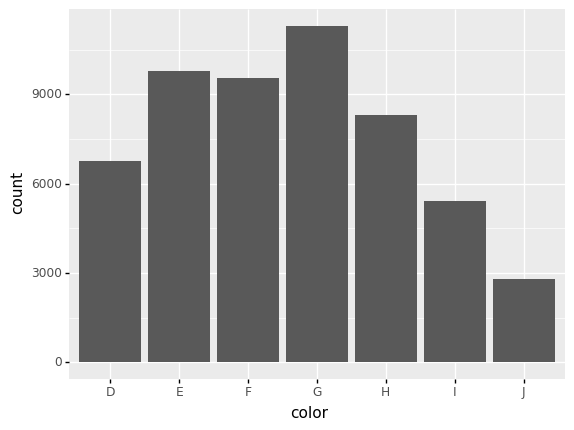

<ggplot: (137895007428)>

In [8]:
from plotnine import *
ggplot(data = diamonds) + geom_bar(mapping = aes(x = 'color'))

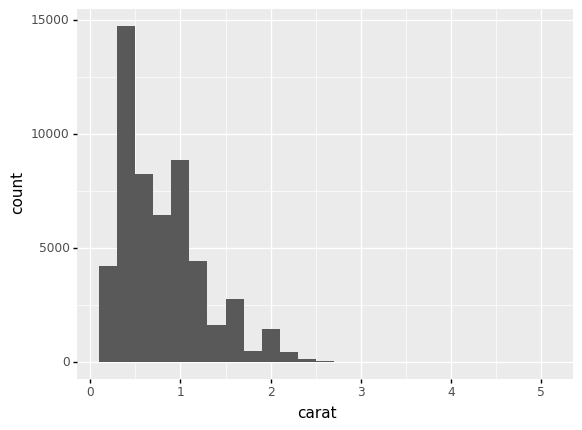

<ggplot: (137895269593)>

In [9]:
ggplot(data = diamonds) + geom_histogram(mapping = aes(x = 'carat'), binwidth = 0.2)

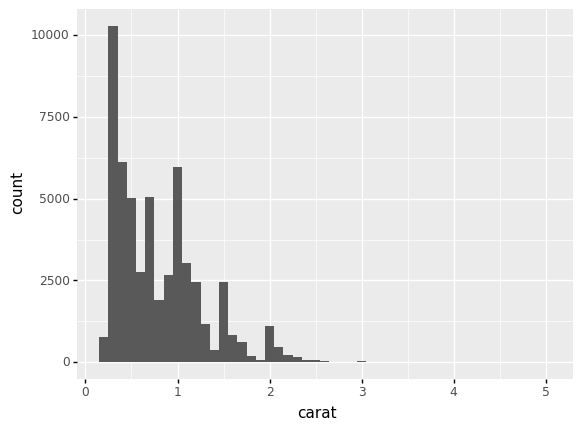

<ggplot: (137896983652)>

In [10]:
ggplot(data = diamonds) + geom_histogram(mapping = aes(x = 'carat'), binwidth = 0.1)

Pick subsamples of dataset on carat column

In [12]:
import numpy as np
np.random.seed(22)
sample1 = diamonds['carat'].sample(n=1000,replace=False)
sample2 = diamonds['carat'].sample(n=1000,replace=False)

In [13]:
print(sample1)
sample2

20631    1.39
35575    0.35
10925    0.96
48348    0.74
4759     0.81
         ... 
42507    0.53
37331    0.33
53454    0.70
53295    0.30
12784    1.00
Name: carat, Length: 1000, dtype: float64


35432    0.32
49058    0.70
25399    1.55
48313    0.25
35652    0.31
         ... 
11710    0.40
52132    0.52
12828    1.00
1356     0.75
11793    1.12
Name: carat, Length: 1000, dtype: float64

In [14]:
sample1_df = sample1.to_frame()
sample2_df = sample2.to_frame()

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.


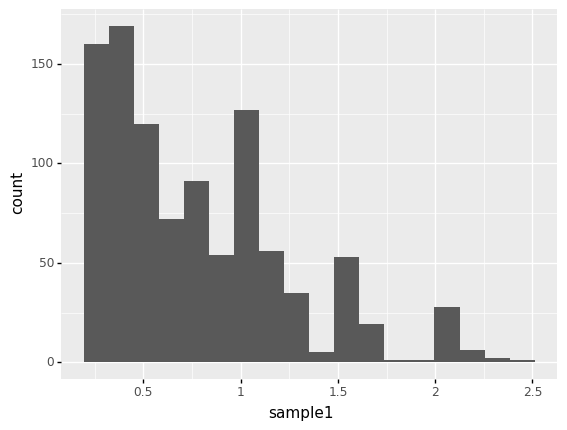

<ggplot: (137896923173)>

In [15]:
ggplot(data = sample1_df) + geom_histogram(mapping = aes(x = 'sample1', binwidth = 0.1))

Plot a Boxplot

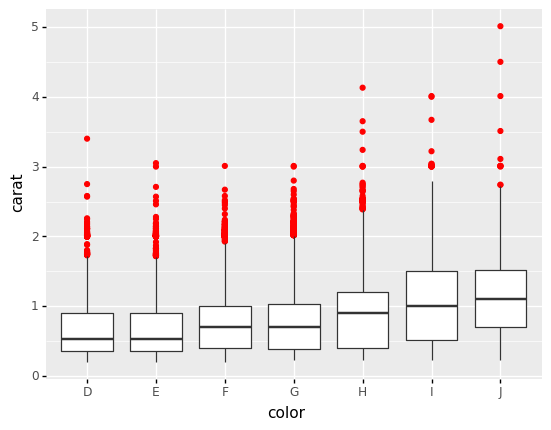

<ggplot: (137896956037)>

In [16]:
ggplot(data = diamonds) + geom_boxplot(mapping = aes(x='color',y = 'carat'),outlier_colour="red")

The presence of those outliers is intriguing. Let us try and establish whether these very high-carat diamonds have an equivalently high price, by creating a scatter plot mapping the two features

Plot a scatterd plot

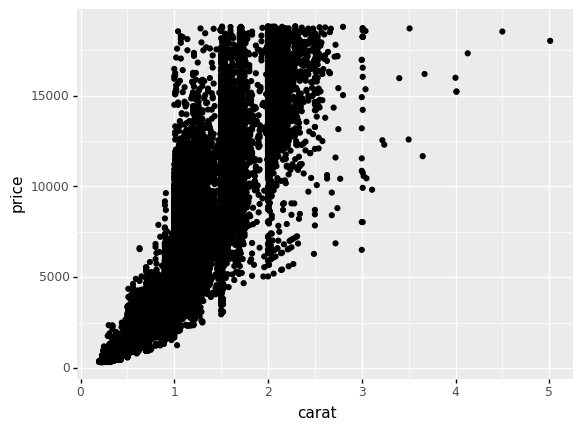

<ggplot: (137897035614)>

In [17]:
ggplot(data = diamonds) + geom_point(mapping = aes(x = 'carat', y = 'price'))

To check the variance
We can see that there is a huge amount of variance among diamonds of the same or similar carat. This suggests that there may be one or more additional features responsible for this variance.
For this task, we shall use different colours to map the cut quality of the diamond onto the scatter plot.

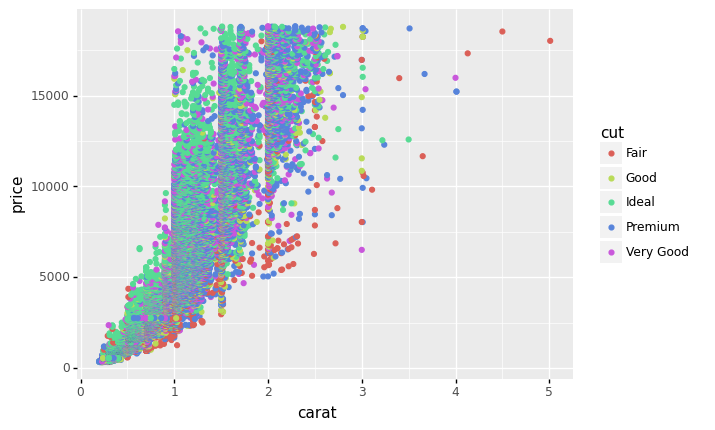

<ggplot: (137896927031)>

In [19]:
ggplot(data = diamonds) + geom_point(mapping = aes(x = 'carat', y = 'price', color = 'cut'))

**relationship between two categorical features**
One method that we can use in lieu are frequency plots, which present a grid representing the possible combinations of two categorical features, with the size of objects in the plot showing the frequency occurrence of each. To identify the spread of observations between category combinations of cut and clarity.

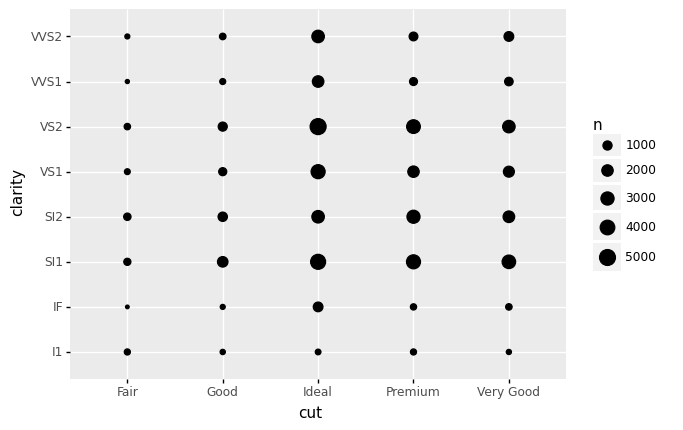

<ggplot: (137903087391)>

In [20]:
ggplot(data = diamonds) + geom_count(mapping = aes(x = 'cut', y= 'clarity'))

Notice that the larger “nodes” signify the most frequent combinations

In [21]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Pearson correlation
One important part of EDA is the identification of correlations between the independent and dependent features, and covariance between independent features in the dataset. A method that can be used to achieve this is the production of correlation matrix. An issue that we face, however, is the presence of categorical features within the data, which will inhibit the production of a correlation matrix. Fortunately, the features in question (“cut”, “color” and “clarity”) are ordinal, meaning that they have a natural order, and can therefore be coded as natural numbers. By default, they should be stored as factors, but we will convert themto integers.

Correlation between categorical data

The firs stept is to transform the categorical data into numerical
The directionality of all features has to be the same, then
* Carat, price, cut and clarity: becomes a better value as it rises
* colour: the less color the best ---> therefore change the direction

In [23]:
#colorNumeric = diamonds['color'].cat.codes
diamonds['color']= diamonds['color'].astype('category')
diamonds['color'] = diamonds['color'].cat.codes
#this changes the color into a numerical value

In [24]:
diamonds['clarity'] = diamonds['clarity'].astype('category')
diamonds['clarity'] = diamonds['clarity'].cat.codes
diamonds['cut'] = diamonds['cut'].astype('category')
diamonds['cut'] = diamonds['cut'].cat.codes

To create a correlation matrix, showing the Pearson correlation coefficients between the features,we can use the corr function of the Pandas dataframe

In [25]:
corr = diamonds.corr(method = "pearson")
corr

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017124,0.291437,-0.214290,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.017124,1.000000,0.000304,0.028235,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037
color,0.291437,0.000304,1.000000,-0.027795,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,-0.214290,0.028235,-0.027795,1.000000,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263
depth,0.028224,-0.194249,0.047279,-0.053080,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.150327,0.026465,-0.088223,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.039860,0.172511,-0.071535,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.022342,0.270287,-0.225721,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.027572,0.263584,-0.217616,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.002037,0.268227,-0.224263,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


 To identify paterns use statistical data visualization (seaborn) and matplotlib to plot the correlations

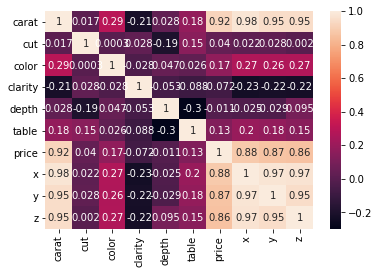

In [26]:
import seaborn as sns
#import matplotlib.pyplot as plt
heatmap = sns.heatmap(corr, annot=True)
#plt.figure(figsize=(9, 4))
#plt.show()

The plot shows a 10 x 10 square matrix and color-fills each cell based on the correlation coefficient between two variables.
* The values inside the cells represent the correlation coefficients between each pair of features and the significance of each. A strong positive correlation is generally given to be any coefficient value of greater than 0.6 (and likewise, a strong negative coefficient can be considered to be any value lower than - 0.6). The corresponding correlation coefficient for carat and price is indicated by the‘new colonial yellow’ box, on the figure above.
* Using this form of graphical EDA is an effective means for discovering potential predictors and identifying covariates. Let us assume that we are building a model which aims to predict diamond price, therefore using that feature as the response variable. As was identified earlier, carat is strongly correlated, but so are the features “x”, “y” and “z”. These features relate to the physical dimensions of the diamond, in the x, y and z planes. However, we can see that all three are highly correlated covariates of each other and may therefore cause issues with multicollinearity. Because of the high degree of interdependency however, there is very little information lost when two of the features are stripped from the dataset, so that would be the recommended course of action, prior to any model development taking place. Some covariance can be tolerated between independent features, but correlation coefficients in excess of around 0.8 (or -0.8) should certainly warrant further attention.

Notice that we should not discount features just because they are not strongly correlated with the
response variable. As we saw earlier in the workshop, while the cut of a diamond is not necessarily a strong predictor of price in isolation, it would appear to be a moderator between carat and price and should therefore be included in any model that is developed.

In [29]:
!pip install seaborn_qqplot

 ## quantile-normal plot

This plot is used to detect how close to **approximating a normal distribution** the data within a particular feature are, and hence act as a guide to whether certain assumptions have been met, and which techniquesare available for use

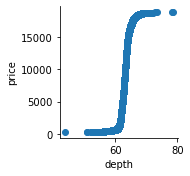

In [30]:
from seaborn_qqplot import pplot
pplot(diamonds, x="depth", y="price", kind='qq')

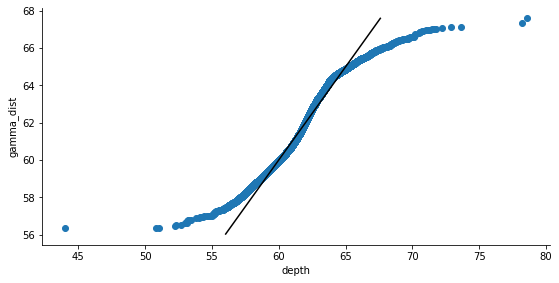

In [32]:
from scipy.stats import gamma
#pplot(diamonds, x="depth", y=gamma, hue="color", kind='qq', height=4, aspect=2, display_kws={"identity":True})
pplot(diamonds, x="depth", y=gamma, kind='qq', height=4, aspect=2, display_kws={"identity":True})

Notice that the line created using the ‘identity:True’ parameter signifies a normal distribution, and **any deviation from this line shows non-normality**. Adapt the above commands for the “carat” feature.

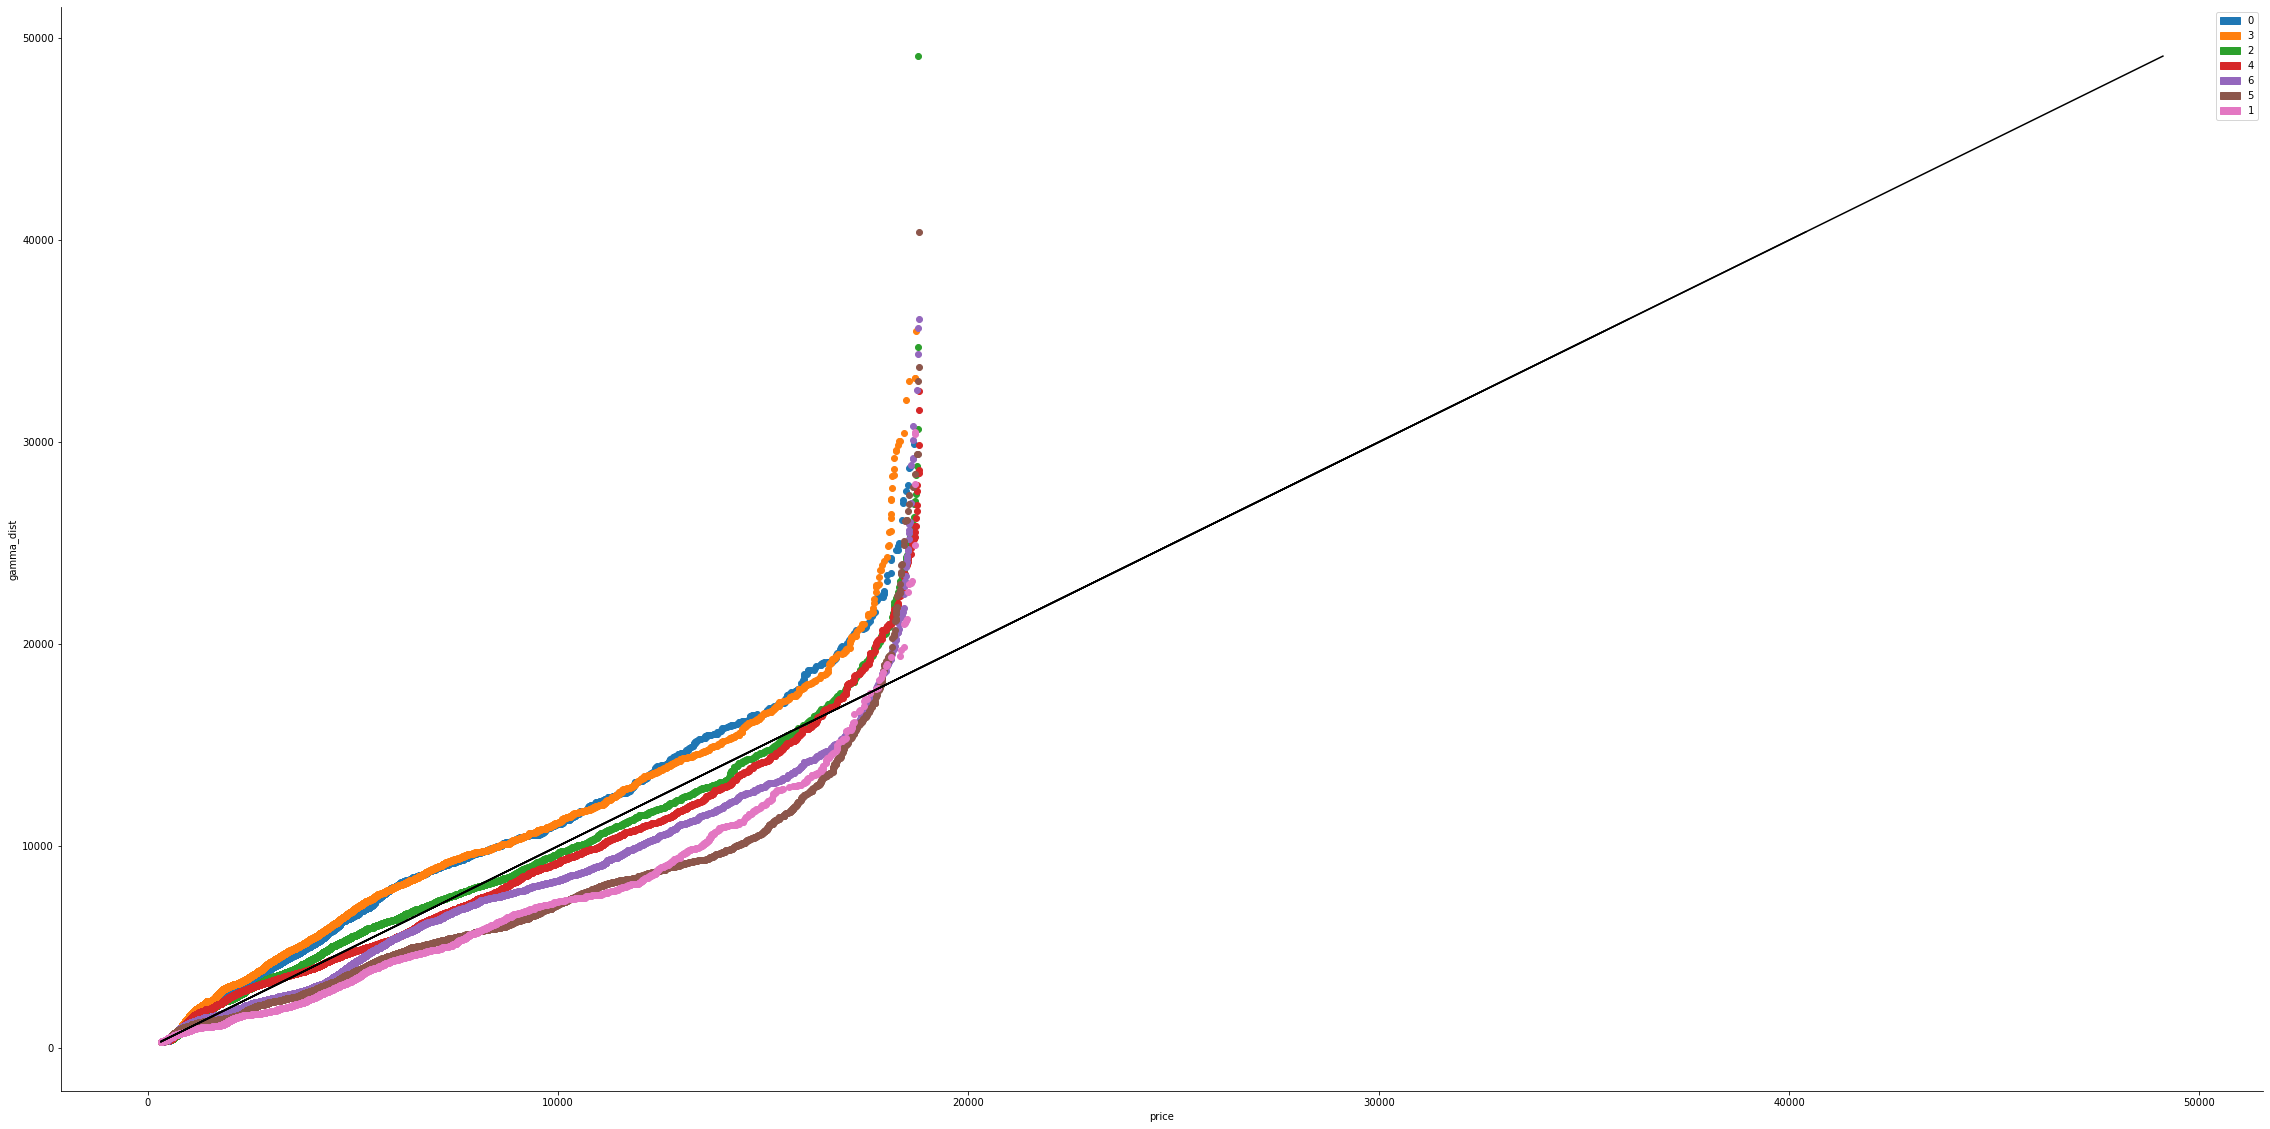

In [33]:
pplot(diamonds, x="price", y=gamma, hue="color", kind='qq', height=16, aspect=2, display_kws={"identity":True})

Notice that the line created using the ‘identity:True’ parameter signifies a normal distribution, and any deviation from this line shows non-normality. 

In [ ]:
References

https://r4ds.had.co.nz/exploratory-data-analysis.html#unusual-values